In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras import models, layers, regularizers
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import scipy.stats as stats
import urllib
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import scipy.stats
from sklearn.metrics import r2_score
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb


In [2]:
np.random.seed(0)
s = 117
_max = 500

In [3]:
data = pd.read_csv('./data_01.csv')
#data =data.drop(["Stability"],axis=1,inplace=False)
data.head(5)

,Laserpower,Scanspeed,LayerThickness,Stability,Width,Depth,ContactAngle,DenudationWidth
0,50,200,0,o,68.597444,NaN,NaN,NaN
1,100,200,0,o,133.185444,NaN,NaN,NaN
2,150,200,0,o,177.784333,NaN,NaN,NaN
3,200,200,0,o,186.593778,372.251333,29.420167,NaN
4,250,200,0,o,189.625000,500.697333,44.163167,NaN


In [4]:
data.head(5)

,Laserpower,Scanspeed,LayerThickness,Stability,Width,Depth,ContactAngle,DenudationWidth
0,50,200,0,o,68.597444,NaN,NaN,NaN
1,100,200,0,o,133.185444,NaN,NaN,NaN
2,150,200,0,o,177.784333,NaN,NaN,NaN
3,200,200,0,o,186.593778,372.251333,29.420167,NaN
4,250,200,0,o,189.625000,500.697333,44.163167,NaN


In [5]:
print(data.shape)

(700, 8)


In [6]:
data_width = data.copy()
data_depth = data.copy()
data_CA = data.copy()
data_Deun = data.copy()

In [7]:
data_width = data_width.drop(['Depth', 'ContactAngle', 'DenudationWidth'], axis = 1).dropna()
data_depth = data_depth.drop(['Width', 'ContactAngle', 'DenudationWidth'], axis = 1).dropna()
data_CA = data_CA.drop(['Width', 'Depth', 'DenudationWidth'], axis = 1).dropna()
data_Deun = data_Deun.drop(['Width', 'Depth', 'ContactAngle'], axis = 1).dropna()

In [8]:
print(data_width.shape)
print(data_depth.shape)
print(data_CA.shape)
print(data_Deun.shape)

(338, 5)
(317, 5)
(318, 5)
(208, 5)


In [9]:
print(data_width.isnull().sum(axis = 0))
print(data_depth.isnull().sum(axis = 0))
print(data_CA.isnull().sum(axis = 0))
print(data_Deun.isnull().sum(axis = 0))

Laserpower          0
Scanspeed           0
LayerThickness      0
Stability           0
Width               0
dtype: int64
Laserpower          0
Scanspeed           0
LayerThickness      0
Stability           0
Depth               0
dtype: int64
Laserpower          0
Scanspeed           0
LayerThickness      0
Stability           0
ContactAngle        0
dtype: int64
Laserpower          0
Scanspeed           0
LayerThickness      0
Stability           0
DenudationWidth     0
dtype: int64


# 1 Width

In [10]:
x_data = data_width.drop(["Width","Stability"],axis=1,inplace=False)
y_data = data_width[["Width"]];
x_data.head(5)

,Laserpower,Scanspeed,LayerThickness
0,50,200,0
1,100,200,0
2,150,200,0
3,200,200,0
4,250,200,0


In [11]:
y_data.head(5)

,Width
0,68.597444
1,133.185444
2,177.784333
3,186.593778
4,189.625000


In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [13]:
lgbm = lgb.LGBMRegressor(random_state=s, seed=s,silent=True)
scores_lgbm = cross_val_score(lgbm, x_data, y_data, cv=5, n_jobs=-1, scoring = "r2")
scores_lgbm

array([0.50889395, 0.94137406, 0.68364404, 0.50601743, 0.83364248])

In [14]:
fitted_model = lgbm.fit(xtrain, ytrain)
y_train_pred= fitted_model.predict(xtrain)
y_test_pred  = fitted_model.predict(xtest)
print('Test_R2 : ',r2_score(ytest,np.where(y_test_pred < 0, 0, y_test_pred)))   

[LightGBM] [Warning] seed is set=117, random_state=117 will be ignored. Current value: seed=117
Test_R2 :  0.9358310395980284


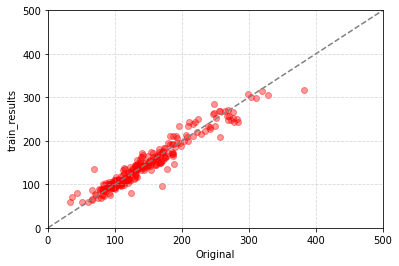

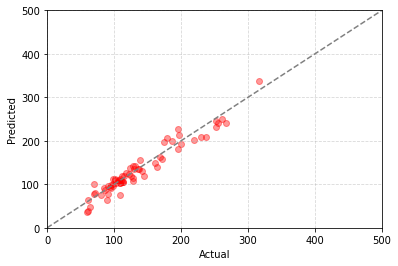

In [15]:
plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(ytrain,y_train_pred, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Original")
plt.ylabel("train_results")
plt.show()

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(y_test_pred,ytest, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# 2 Depth

In [16]:
x_data = data_depth.drop(["Depth","Stability"],axis=1,inplace=False)
y_data = data_depth[["Depth"]];
x_data.head(5)

,Laserpower,Scanspeed,LayerThickness
3,200,200,0
4,250,200,0
5,300,200,0
6,350,200,0
7,400,200,0


[LightGBM] [Warning] seed is set=117, random_state=117 will be ignored. Current value: seed=117
Test_R2 :  0.8893176192778277


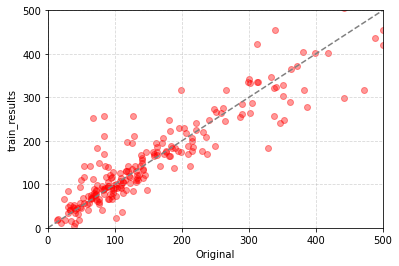

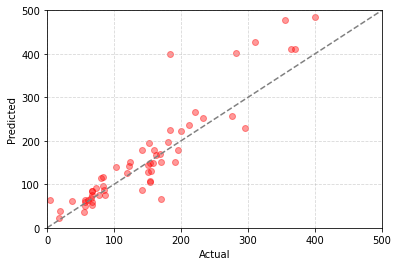

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

lgbm = lgb.LGBMRegressor(random_state=s, seed=s,silent=True)
scores_lgbm = cross_val_score(lgbm, x_data, y_data, cv=5, n_jobs=-1, scoring = "r2")
scores_lgbm

fitted_model = lgbm.fit(xtrain, ytrain)
y_train_pred= fitted_model.predict(xtrain)
y_test_pred  = fitted_model.predict(xtest)
print('Test_R2 : ',r2_score(ytest,np.where(y_test_pred < 0, 0, y_test_pred)))   

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(ytrain,y_train_pred, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Original")
plt.ylabel("train_results")
plt.show()

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(y_test_pred,ytest, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# 3 ContactAngle

In [18]:
x_data = data_CA.drop(["ContactAngle","Stability"],axis=1,inplace=False)
y_data = data_CA[["ContactAngle"]];
x_data.head(5)

,Laserpower,Scanspeed,LayerThickness
3,200,200,0
4,250,200,0
5,300,200,0
6,350,200,0
7,400,200,0


[LightGBM] [Warning] seed is set=117, random_state=117 will be ignored. Current value: seed=117
Test_R2 :  0.6245900513896485


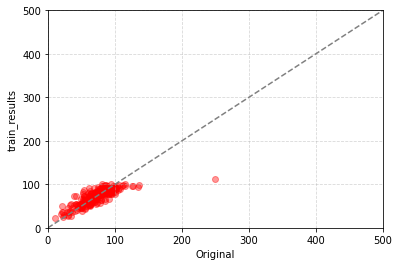

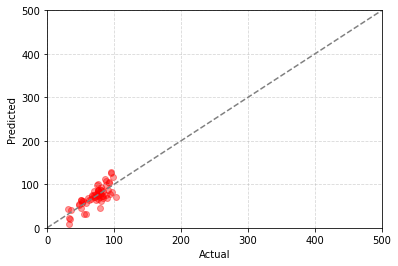

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

lgbm = lgb.LGBMRegressor(random_state=s, seed=s,silent=True)
scores_lgbm = cross_val_score(lgbm, x_data, y_data, cv=5, n_jobs=-1, scoring = "r2")
scores_lgbm

fitted_model = lgbm.fit(xtrain, ytrain)
y_train_pred= fitted_model.predict(xtrain)
y_test_pred  = fitted_model.predict(xtest)
print('Test_R2 : ',r2_score(ytest,np.where(y_test_pred < 0, 0, y_test_pred)))   

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(ytrain,y_train_pred, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Original")
plt.ylabel("train_results")
plt.show()

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(y_test_pred,ytest, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# 4 DenudationWidth

In [20]:
x_data = data_Deun.drop(["DenudationWidth","Stability"],axis=1,inplace=False)
y_data = data_Deun[["DenudationWidth"]];
x_data.head(5)

,Laserpower,Scanspeed,LayerThickness
101,100,200,20
102,150,200,20
103,200,200,20
104,250,200,20
105,300,200,20


[LightGBM] [Warning] seed is set=117, random_state=117 will be ignored. Current value: seed=117
Test_R2 :  0.6881418381414149


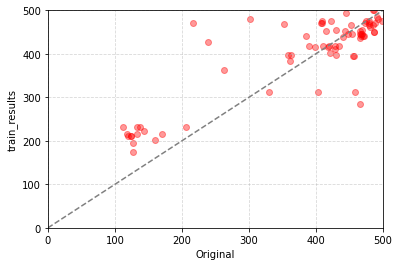

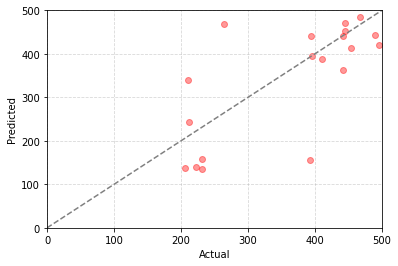

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

lgbm = lgb.LGBMRegressor(random_state=s, seed=s,silent=True)
scores_lgbm = cross_val_score(lgbm, x_data, y_data, cv=5, n_jobs=-1, scoring = "r2")
scores_lgbm

fitted_model = lgbm.fit(xtrain, ytrain)
y_train_pred= fitted_model.predict(xtrain)
y_test_pred  = fitted_model.predict(xtest)
print('Test_R2 : ',r2_score(ytest,np.where(y_test_pred < 0, 0, y_test_pred)))   

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(ytrain,y_train_pred, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Original")
plt.ylabel("train_results")
plt.show()

plt.plot([0,_max],[0,_max],color='gray',linestyle='--')
plt.scatter(y_test_pred,ytest, alpha=0.4,color='red')
plt.axis([0,_max, 0,_max])
plt.grid(True,alpha=0.5, linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()